Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Head (m)')

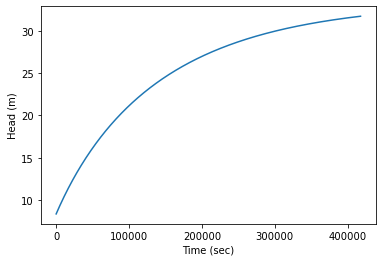

In [5]:

#import functions we need
%pylab inline
from scipy.integrate import odeint

#Define parameters
L=1000. #m
D_H = 1. #m
f = 0.1
A_R = 5000. #m^2
C_f = 1 + f*L/D_H 
A_c = pi*D_H/4. # m^2
R_i = 1.# m^3/s
R_f = 2.# m^3/s
g =9.8

#Set up analytical solution


#Define the derivative as a function
def Q(h):
    return A_c * sqrt(2*g*h/C_f)

def dh_dt(h, t, R):
    thisQ = Q(h)
    return (R - thisQ)/A_R

#Set up arrays for variables (time)
tau_res = A_R*C_f*R_f/(2.*g*A_c**2)
t_end = tau_res*5.
t = linspace(0, t_end, 500)
h_i = (R_i/A_c)**2*C_f/(2.*g)

#Solve using odeint
h = odeint(dh_dt, h_i, t, args=(R_f,))

#Plot the solution
plot(t, h)
xlabel('Time (sec)')
ylabel('Head (m)')

In [34]:

#import functions we need
%pylab inline
from scipy.integrate import odeint

def run_sim(omega):

    #Define parameters
    L=1000. #m
    D_H = 1. #m
    f = 0.1
    A_R2 = 5000. #m^2
    A_R1 = 50. #m^2

    C_f = 1 + f*L/D_H 
    A_c = pi*D_H/4. # m^2
    g =9.8

    #Define the derivative as a function
    def Q(dh):
        return A_c * sqrt(2*g*abs(dh)/C_f)*abs(dh)/dh

    def R(t):
        return sin(omega*t) + 1.

    def dh_dt(h, t):
        h1 = h[0]
        h2 = h[1]
        this_R = R(t) 
        Q1 = Q(h1-h2)
        Q2 = Q(h2)
        dh1_dt = (R(t) - Q1)/A_R1
        dh2_dt = (Q1 - Q2)/A_R2
        return [dh1_dt, dh2_dt]

    P = 2*pi/omega
    print('P=',P)
    t_end = 3*P
    print('t_end=',t_end)
    t = linspace(0, t_end, 500)

    R_avg = 1.
    h1_eq = C_f*R_avg**2./(g*A_c**2) 
    h2_eq = h1_eq/2. 

    #Solve using odeint
    h = odeint(dh_dt, [h1_eq, h2_eq], t)

    #Plot the solution
    h1 = h[:,0]
    h2 = h[:,1]
    print('h1=',h1[-10:])
    figure()
    plot(t, h1/h1_eq)
    plot(t, h2/h2_eq)
    plot(t, R(t), '--')
    xlabel('Time (sec)')
    ylabel('Normalized Head (m)')
    legend(['h1','h2', 'R'])
    t_osc = 2*pi/omega 
    t_res_1 = h1_eq*A_R1/R_avg
    t_res_2 = h2_eq*A_R2/R_avg
    print("Dimensionless ratio 1 = ",t_osc/t_res_1)
    print("Dimensionless ratio 2 = ",t_osc/t_res_2)
    


Populating the interactive namespace from numpy and matplotlib


P= 1570796.3267948967
t_end= 4712388.980384691
h1= [-1.11140028e+164 -1.27037604e+168  2.39611090e+228  5.32558602e-166
 -7.89288972e+251 -5.40738434e+039 -8.86869326e-029  6.44540622e+245
  1.67304891e-016 -6.89463221e-151]
Dimensionless ratio 1 =  1880.3311353152121
Dimensionless ratio 2 =  37.60662270630424


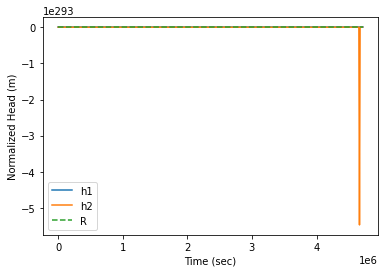

In [35]:
run_sim(4e-6)

P= 15707.963267948964
t_end= 47123.88980384689
h1= [10.6908612  10.93572232 11.19679878 11.47425771 11.76821985 12.07875854
 12.4058988  12.74961645 13.10983745 13.48643739]
Dimensionless ratio 1 =  18.803311353152118
Dimensionless ratio 2 =  0.3760662270630423


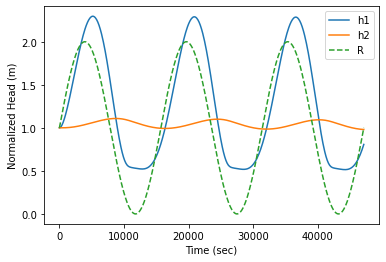

In [36]:
run_sim(4e-4)

P= 157.07963267948966
t_end= 471.23889803846896
h1= [16.52265558 16.51691126 16.51185417 16.50749105 16.50382765 16.50086873
 16.49861805 16.49707833 16.49625131 16.49613769]
Dimensionless ratio 1 =  0.1880331135315212
Dimensionless ratio 2 =  0.0037606622706304236


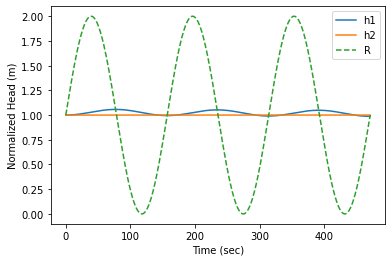

In [37]:
run_sim(4e-2)